In [1]:
%pylab inline
from parcels import FieldSet, Field, ParticleSet, JITParticle, AdvectionRK4, ErrorCode, Variable
import cartopy
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import colors, cm
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import math as math
import matplotlib.animation as animation
sys.path.insert(1, '/home/sypmauu/GalapagosProject/scripts/functions')
from ParticlePlotFunctions import *
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load particle data

namefile = '../../data_output/DrifterArrival_wrong.nc'
Traj = ReadTrajectories(namefile)
namefile = '../../data_output/DrifterArrival_wrong_stokes.nc'
Traj_wstokes = ReadTrajectories(namefile)

In [71]:
# compute variables of interest

# Galapagos Islands
galapagos_extent = np.array([[-91.7, -89.9, -1.1,  0.2],
                             [-90.8, -90.3,  0.2,  0.7],
                             [-90.6, -89.5, -1.6, -1.1],
                             [-89.9, -89.0, -1.1, -0.5]])


release_time = 74
release_loc  = 784

ptime= Traj['time'][:]
ptime[isnat(ptime)]=Traj['time'][0,0]
simtimes = np.arange(np.min(ptime), np.max(ptime), dtype='datetime64[1D]')

# variables of interest
successrate = np.zeros((galapagos_extent.shape[0],release_loc,2))
success_variability = np.zeros((release_time,8,2))
arrival_variability = np.zeros((simtimes.shape[0],8,2))
traveltime = np.zeros((release_loc,release_time,2))


# loop through all particles
for p in range(Traj['visitedgalapagos'].shape[0]):               
    index_loc = p%release_loc
    release_time = math.floor(p/release_loc)
    simulation = 0
    
    while simulation < 2:
        if simulation == 0:
            ptemp = Traj['visitedgalapagos'][p,:]
        else:
            ptemp = Traj_wstokes['visitedgalapagos'][p,:]
        ptemp[isnan(ptemp)]=0    
        if np.any(ptemp != 0):                                       # check whether visited Galapagos
            I = np.where(ptemp != 0)[0][0]                           # find first index when        
            ii = 1
            while (ii != ptemp[I] and ii < 5):                       # check at which island particle arrives
                ii += 1
            successrate[ii-1,index_loc,simulation] += 1

            if (Traj['lon'][p,0] > -92.8 and Traj['lon'][p,0] < -88.4 and
                Traj['lat'][p,0] >= 1.6 and Traj['lat'][p,0] <= 2.8):
                arrival_time = np.where(simtimes == ptime[p,I].astype('datetime64[1D]'))[0]
                success_variability[release_time,0,simulation] += 1    
                arrival_variability[arrival_time,0,simulation] += 1
                traveltime[index_loc,release_time,simulation] = arrival_time - 5*release_time
            if (Traj['lon'][p,0] >= -88.4 and Traj['lon'][p,0] <= -87.2 and
                Traj['lat'][p,0] >= 1.6 and Traj['lat'][p,0] <= 2.8):
                arrival_time = np.where(simtimes == ptime[p,I].astype('datetime64[1D]'))[0]
                success_variability[release_time,1,simulation] += 1    
                arrival_variability[arrival_time,1,simulation] += 1
                traveltime[index_loc,release_time,simulation] = arrival_time - 5*release_time
            if (Traj['lon'][p,0] >= -88.4 and Traj['lon'][p,0] <= -87.2 and
                Traj['lat'][p,0] > -2.8 and Traj['lat'][p,0] < 1.6):
                arrival_time = np.where(simtimes == ptime[p,I].astype('datetime64[1D]'))[0]
                success_variability[release_time,2,simulation] += 1    
                arrival_variability[arrival_time,2,simulation] += 1
                traveltime[index_loc,release_time,simulation] = arrival_time - 5*release_time
            if (Traj['lon'][p,0] >= -88.4 and Traj['lon'][p,0] <= -87.2 and
                Traj['lat'][p,0] >= -4 and Traj['lat'][p,0] <= -2.8):
                arrival_time = np.where(simtimes == ptime[p,I].astype('datetime64[1D]'))[0]
                success_variability[release_time,3,simulation] += 1    
                arrival_variability[arrival_time,3,simulation] += 1
                traveltime[index_loc,release_time,simulation] = arrival_time - 5*release_time
            if (Traj['lon'][p,0] > -92.8 and Traj['lon'][p,0] < -88.4 and
                Traj['lat'][p,0] >= -4 and Traj['lat'][p,0] <= -2.8):
                arrival_time = np.where(simtimes == ptime[p,I].astype('datetime64[1D]'))[0]
                success_variability[release_time,4,simulation] += 1    
                arrival_variability[arrival_time,4,simulation] += 1
                traveltime[index_loc,release_time,simulation] = arrival_time - 5*release_time
            if (Traj['lon'][p,0] >= -94 and Traj['lon'][p,0] <= -92.8 and
                Traj['lat'][p,0] >= -4 and Traj['lat'][p,0] <= -2.8):
                arrival_time = np.where(simtimes == ptime[p,I].astype('datetime64[1D]'))[0]
                success_variability[release_time,5,simulation] += 1    
                arrival_variability[arrival_time,5,simulation] += 1
                traveltime[index_loc,release_time,simulation] = arrival_time - 5*release_time
            if (Traj['lon'][p,0] >= -94 and Traj['lon'][p,0] <= -92.8 and
                Traj['lat'][p,0] > -2.8 and Traj['lat'][p,0] < 1.6):
                arrival_time = np.where(simtimes == ptime[p,I].astype('datetime64[1D]'))[0]
                success_variability[release_time,6,simulation] += 1    
                arrival_variability[arrival_time,6,simulation] += 1
                traveltime[index_loc,release_time,simulation] = arrival_time - 5*release_time
            if (Traj['lon'][p,0] >= -94 and Traj['lon'][p,0] <= -92.8 and
                Traj['lat'][p,0] >= 1.6 and Traj['lat'][p,0] <= 2.8):
                arrival_time = np.where(simtimes == ptime[p,I].astype('datetime64[1D]'))[0]
                success_variability[release_time,7,simulation] += 1    
                arrival_variability[arrival_time,7,simulation] += 1
                traveltime[index_loc,release_time,simulation] = arrival_time - 5*release_time
        simulation += 1
                

# load land mask

latdim = np.arange(1000,2001)
londim = np.arange(2000,3001)
bathy_file = '/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA/ORCA0083-N006/domain/bathymetry_ORCA12_V3.3.nc'
dfile = Dataset(bathy_file)
landmask = dfile.variables['mask'][latdim,londim]
lat = dfile.variables['nav_lat'][latdim,londim]
lon = dfile.variables['nav_lon'][latdim,londim]

#starting longitudes and latitudes

GC = [-90.5,-0.5] #centre of the Galapagos islands
release_extent = [GC[0]-3.5, GC[0]+3.5, GC[1]-3.5, GC[1]+3.5]
width = 7 #thicknes (in number of particles) of release square around Galapagos
templon, templat = np.meshgrid(np.arange(release_extent[0],
                                         release_extent[1],0.2),
                               np.arange(release_extent[2],
                                         release_extent[3],0.2))
templon[width:-width,width:-width]= np.nan
templat[width:-width,width:-width]= np.nan
startlon = templon[np.logical_not(np.isnan(templon))]
startlat = templat[np.logical_not(np.isnan(templat))]

In [10]:
def probability_of_arrival():

    figsize=(14,7)
    map_extent = [-94.5, -86.8, -4.2, 3.1]
    fig, axs = plt.subplots(1, 2, figsize=figsize, 
                              sharex = True, 
                              sharey = True)
    fig.subplots_adjust(hspace=.5, wspace=.1)
    axs = axs.ravel()
    fig.text(0.5, 0.03, 'longitude', ha='center', va='center')
    fig.text(0.07, 0.5, 'latitude', ha='center', va='center', rotation='vertical')

    i=0
    while i < 2:
        axs[i].contourf(lon,lat,landmask,cmap='Greys_r')
        im = axs[i].scatter(startlon,startlat,s=90,
                        c=np.sum(successrate[:,:,i],axis=0)/release_time*100,
                        cmap='ocean_r',
                        vmin=0,vmax=80) 
        if i == 0:
            axs[i].set_title('NEMO')
        else:
            axs[i].set_title('NEMO with stokes drift')   
        axs[i].set_xlim(map_extent[0:2])
        axs[i].set_ylim(map_extent[2:4])
        axs[i].text(0.03,0.95,'%.2f'%(np.sum(successrate[:,:,i])/58016*100)+'%',
                    fontsize=14, 
                    transform = axs[i].transAxes)
        i += 1

    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax, extend='max')
    cbar.ax.set_ylabel('probability of arrival (%)')

    plt.savefig('arrival_probability.pdf')

In [11]:
def probability_arrival_at_islands(simulation,filename):

    figsize=(10,10)
    map_extent = [-94.5, -86.8, -4.2, 3.1]
    fig, axs = plt.subplots(2, 2, figsize=figsize, 
                                  sharex = True, 
                                  sharey = True)
    fig.subplots_adjust(hspace=.1, wspace=.1)
    axs = axs.ravel()
    fig.text(0.5, 0.1, 'longitude', ha='center', va='center')
    fig.text(0.07, 0.5, 'latitude', ha='center', va='center', rotation='vertical')
    if simulation == 0:
        fig.text(0.5, 0.9, 'NEMO', ha='center', va='center')
    else:
        fig.text(0.5, 0.9, 'NEMO with stokes drift', ha='center', va='center')

    i=0
    while i < 4:
        axs[i].contourf(lon,lat,landmask,cmap='Greys_r')
        im = axs[i].scatter(startlon,startlat,s=90,
                            c=successrate[i,:,simulation]/release_time*100,
                            cmap='ocean_r',
                            vmin=0,vmax=50) 
        axs[i].set_xlim(map_extent[0:2])
        axs[i].set_ylim(map_extent[2:4])
        maplon = np.arange(galapagos_extent[i,0],galapagos_extent[i,1]+0.1,0.1)
        maplat = np.arange(galapagos_extent[i,2],galapagos_extent[i,3]+0.1,0.1)
        axs[i].contourf(maplon,maplat,
                        np.zeros((len(maplat),len(maplon))),
                        levels=np.linspace(0,1,2), cmap='Greys')

        axs[i].text(0.03,0.92,'%.2f'%(np.sum(successrate[i,:,simulation])/58016*100)+'%',
                    fontsize=14, transform = axs[i].transAxes)
        i += 1
    
    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax, extend='max')
    cbar.ax.set_ylabel('probability of arrival (%)')

    plt.savefig(filename + '.pdf')

In [12]:
def variability_arrivals():

    figsize=(15,10)
    ptime= Traj['time'][:,0] 
    plottimes = np.arange(np.min(ptime), np.max(ptime), dtype='datetime64[5D]')
    map_extent = [plottimes[0], plottimes[-1], 0, 30]
    fig, axs = plt.subplots(2, 1, figsize=figsize, 
                                  sharex = True, 
                                  sharey = True)
    axs = axs.ravel() 
    axs[0].plot(plottimes,np.sum(success_variability[:-1,:,0],1)/release_loc*100,'k')
    axs[0].plot(plottimes,np.sum(success_variability[:-1,:,1],1)/release_loc*100,'k--')
    axs[0].set_xlim(map_extent[0:2])
    axs[0].set_ylim(map_extent[2:4])
    axs[0].legend(('nemo','nemo with stokes drift'))
    axs[0].set_ylabel('% of particle arrivals')
    axs[0].set_title('variability release time')
    axs[0].text(0.01,0.92,'a)',
                    fontsize=14, 
                    transform = axs[0].transAxes)


    totalarrival = np.sum(arrival_variability[:,:,0],1)
    totalarrival_stokes = np.sum(arrival_variability[:,:,1],1)
    ta=[]
    tas=[]
    for i in range(plottimes.shape[0]):
        tstart = i*5
        ta.append(np.sum(totalarrival[tstart:tstart+4]))
        tas.append(np.sum(totalarrival_stokes[tstart:tstart+4]))
    ta = np.asarray(ta)
    tas = np.asarray(tas)
    axs[1].plot(plottimes,ta/784*100,'k')
    axs[1].plot(plottimes,tas/784*100,'k--')
    axs[1].legend(('nemo','nemo with stokes drift'))
    axs[1].set_ylabel('% of particle arrivals')
    axs[1].set_title('variability arrival time')
    axs[1].text(0.01,0.92,'b)',
                    fontsize=14, 
                    transform = axs[1].transAxes)
    
    plt.savefig('variability_arrival.pdf')

In [13]:
def variability_direction():

    figsize=(15,10)
    ptime= Traj['time'][:,0] 
    plottimes = np.arange(np.min(ptime), np.max(ptime), dtype='datetime64[5D]')
    map_extent = [plottimes[0], plottimes[-1], 0, 100]
    fig, axs = plt.subplots(2, 1, figsize=figsize, 
                                  sharex = True, 
                                  sharey = False)
    axs = axs.ravel() 
    boxes = ['N','NE','E','SE','S','SW','W','NW']
    
    weight = [147,49,147,49,147,49,147,49]
    axs[0].plot(plottimes,success_variability[:-1,:,0]/weight*100)
    axs[0].legend(boxes)
    axs[0].set_ylabel('% of particle arrivals')
    axs[0].set_title('variability of release time')
    axs[0].set_xlim(map_extent[0:2])
    axs[0].set_ylim(map_extent[2:4])
    
    axs[1].plot(simtimes,arrival_variability[:,:,0]/weight*100)
    axs[1].legend(boxes)
    axs[1].set_ylabel('% of particle arrivals')
    axs[1].set_title('variability of arrival time')
    axs[1].set_xlim(map_extent[0:2])
    axs[1].set_ylim([0,40])
    
    plt.savefig('variability_direction.pdf')

In [77]:
def traveltime_map(binmax,binstep,density_threshold):

    traveltime[traveltime==0]=nan
    db = binstep
    threshold = density_threshold
    bins=np.arange(0,binmax,db)
    lifetime_minimum = np.zeros((release_loc,2))
    
    for t in range(release_loc):  
        if np.any(traveltime[t,:,0] > 0):
            selection = traveltime[t,:,0]
            selection = selection[~isnan(selection)]
            n, bins = np.histogram(selection, bins, density=True)
            maxloc = np.where(np.cumsum(n*db)>threshold)[0][0]
            lifetime_minimum[t,0]=binout[maxloc]+db/2
        if np.any(traveltime[t,:,1] > 0):
            selection = traveltime[t,:,1]
            selection = selection[~isnan(selection)]
            n, bins = np.histogram(selection, bins, density=True)
            maxloc = np.where(np.cumsum(n*db)>threshold)[0][0]
            lifetime_minimum[t,1]=binout[maxloc]+db/2
            
            
    figsize=(14,7)
    map_extent = [-94.5, -86.8, -4.2, 3.1]
    fig, axs = plt.subplots(1, 2, figsize=figsize, 
                              sharex = True, 
                              sharey = True)
    fig.subplots_adjust(hspace=.5, wspace=.1)
    axs = axs.ravel()
    fig.text(0.5, 0.03, 'longitude', ha='center', va='center')
    fig.text(0.07, 0.5, 'latitude', ha='center', va='center', rotation='vertical')

    i=0
    while i < 2:
        axs[i].contourf(lon,lat,landmask,cmap='Greys_r')
        im = axs[i].scatter(startlon,startlat,s=90,
                        c=lifetime_minimum[:,i],
                        cmap='ocean_r',
                        vmin=0,vmax=100) 
        if i == 0:
            axs[i].set_title('NEMO')
        else:
            axs[i].set_title('NEMO with stokes drift')   
        axs[i].set_xlim(map_extent[0:2])
        axs[i].set_ylim(map_extent[2:4])
        i += 1

    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax, extend='max')
    cbar.ax.set_ylabel('traveltime in which ' + str(density_threshold*100) + '% of particles arrives (days)')
    
    plt.savefig('traveltime_90perc.pdf')

### Particle simulation

- Release location: grid around Galapagos
- Release time: every 5 days for 2008
- Advection: forward for 180 days
- For now only in NEMO

### Probability of arrival @ Galapagos

Probability = #particles that arrived at the Galapagos / #particles released at that location.

Percentage in upper right corner = mean probability of arrival (#particles arriving / #total release)

Notes:
- Arrival mainly from the east
- Incorporation of stokes drift has little affect in this set-up
- Assumes that everywhere in the ocean the same amount of plastic can be found
- 'Sensitive' to choice of Galapagos extent 

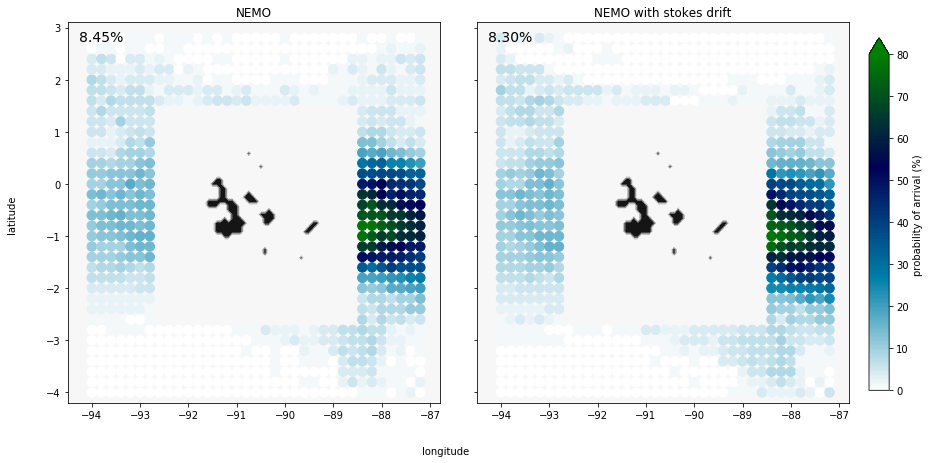

In [14]:
probability_of_arrival()

### Arrival at different islands of Galapagos

Galapagos Islands are separated in four sections. The probability of arrival is determined for each of these sections separately. 

Notes:
- different section receive about same number of particles
- main arrival pathways from the east (for all islands) and from the west (for largest island --> Isabela)
- with or without stokes drift very similar

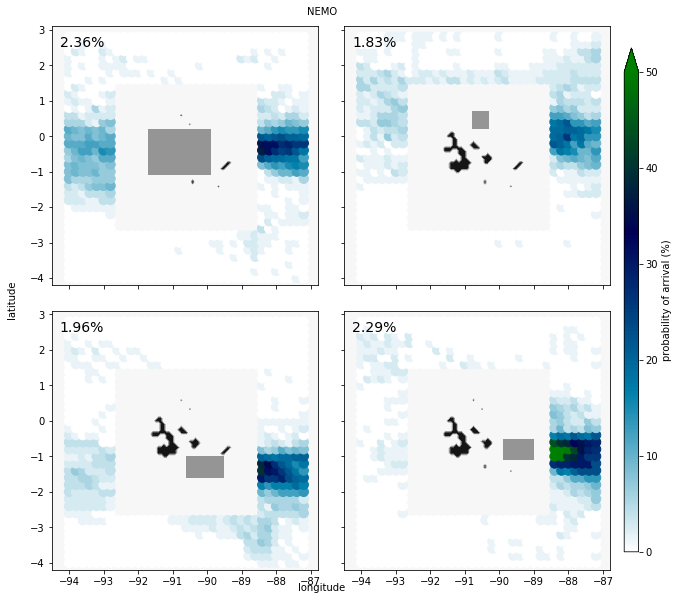

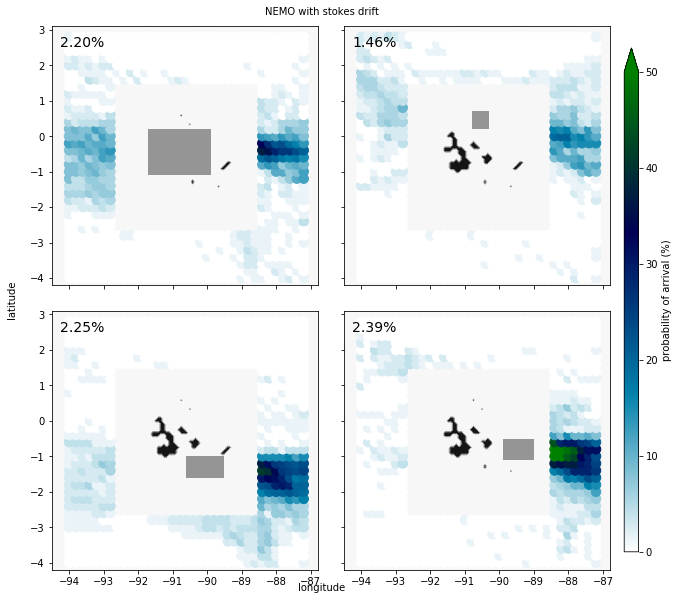

In [15]:
probability_arrival_at_islands(0,'arrival_probability_islands')
probability_arrival_at_islands(1,'arrival_probability_islands_wstokes')

### Variability of particle arrival time

Figure a): if interested in when to deploy drifters. This figure shows how many particles arrived at the Galapagos that were released at a certain time.

Figure b): if interested in when particles arrive. This figure shows at each time how many particles arrive at the Galapagos.

Notes:
- arrival (and release) variability seems to be about 50 particles (6.3%) per 5 days 
- peaks (25% per 5 days) possibly indicate temporary large flux of particles arriving at the Galapagos 
- stokes drift does not lead to difference in particle arrival time variability

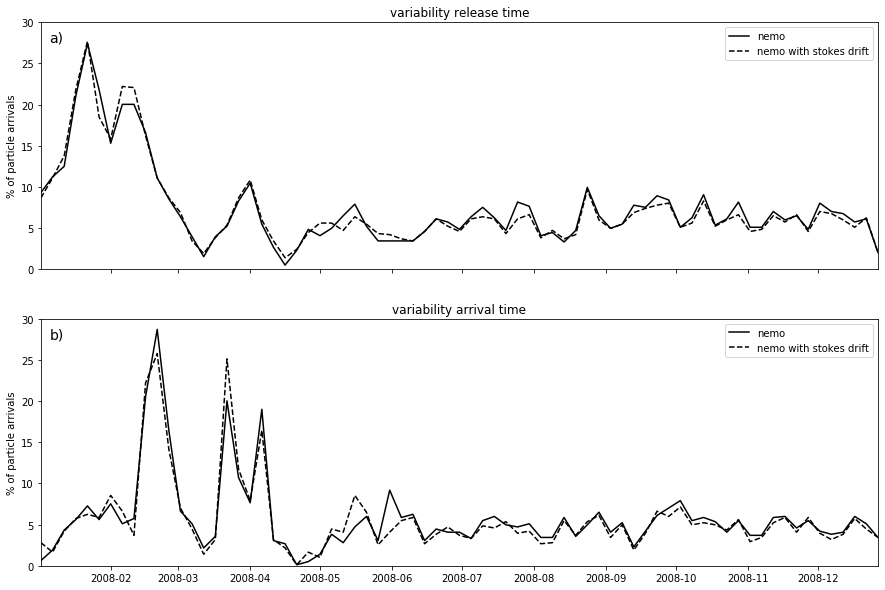

In [16]:
variability_arrivals()

### Variability in arrival time with respect to origin particle



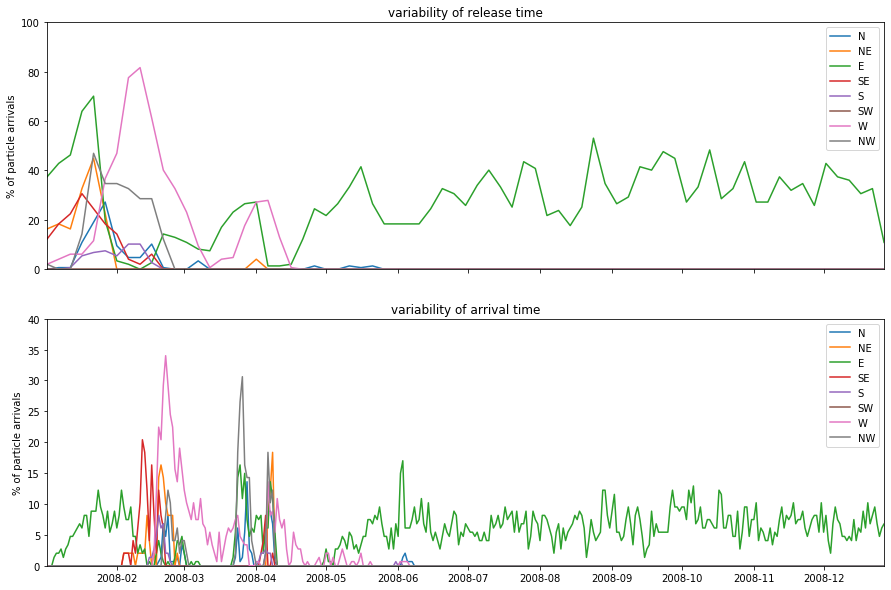

In [18]:
variability_direction()

### Comments

- Longer simulation is needed
- Repeat similar analysis in HYCOM and MITgcm data


- What physical (?) mechanisms causes peaks in particle arrivals?
- How sensitive are the results to choice of galapagos extent?
- Is it possible to make the release dependent on the probability to find plastic there?

- Stokes Drift does not seem to affect pathways and variability  


### Work on arrival time distribution 

Plots provide mean traveltime from release location to island and the traveltime (battery life) for 90% (threshold) to arrive. Improvements:

- Better define the islands (now arrival within a few days from release location)
- Release particles everywhere in a certain radius from the islands

/home/sypmauu/.conda/envs/py3_parcels/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


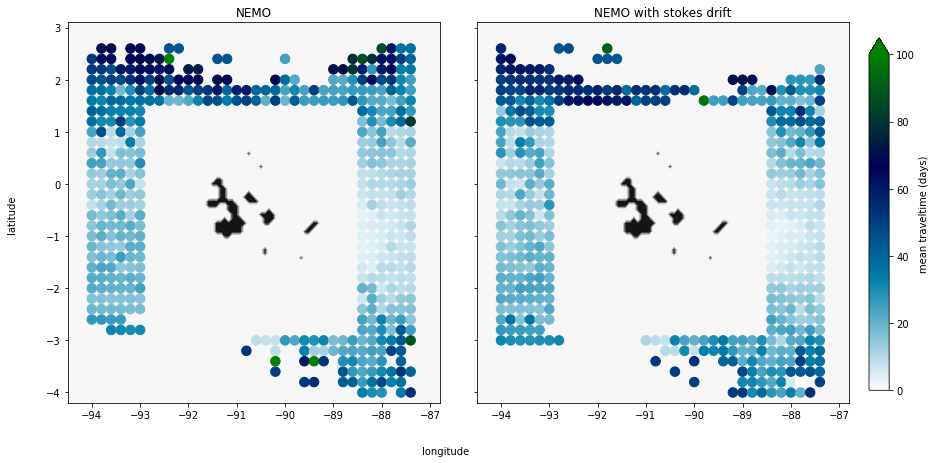

In [76]:
    traveltime[traveltime==0]=nan
    figsize=(14,7)
    map_extent = [-94.5, -86.8, -4.2, 3.1]
    fig, axs = plt.subplots(1, 2, figsize=figsize, 
                              sharex = True, 
                              sharey = True)
    fig.subplots_adjust(hspace=.5, wspace=.1)
    axs = axs.ravel()
    fig.text(0.5, 0.03, 'longitude', ha='center', va='center')
    fig.text(0.07, 0.5, 'latitude', ha='center', va='center', rotation='vertical')

    i=0
    while i < 2:
        axs[i].contourf(lon,lat,landmask,cmap='Greys_r')
        im = axs[i].scatter(startlon,startlat,s=90,
                        c=np.nanmean(traveltime[:,:,i],axis=1),
                        cmap='ocean_r',
                        vmin=0,vmax=100) 
        if i == 0:
            axs[i].set_title('NEMO')
        else:
            axs[i].set_title('NEMO with stokes drift')   
        axs[i].set_xlim(map_extent[0:2])
        axs[i].set_ylim(map_extent[2:4])
        i += 1

    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax, extend='max')
    cbar.ax.set_ylabel('mean traveltime (days)')
    
    plt.savefig('mean_traveltime.pdf')

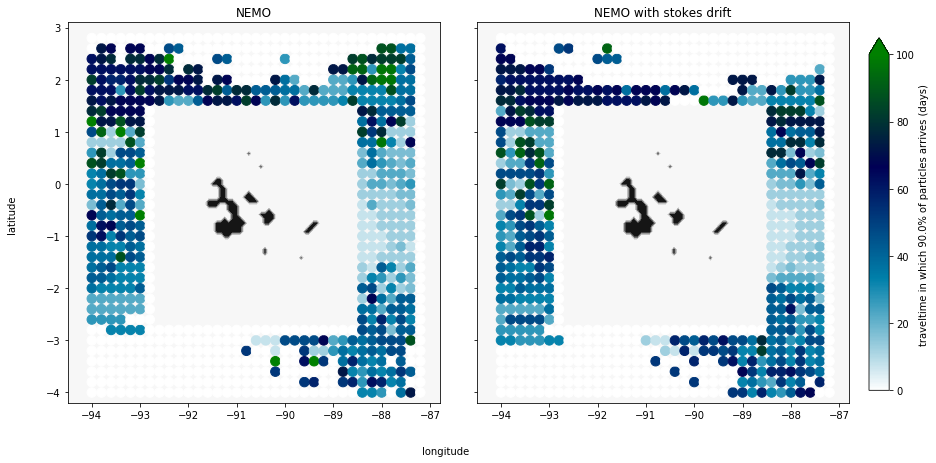

In [79]:
traveltime_map(150,5,0.9)